Epoch 1:
training error = 52.466000%
testing error = 20.293000% 

Epoch 2:
training error = 13.543000%
testing error = 11.715000% 

Epoch 3:
training error = 8.700000%
testing error = 5.649000% 

Epoch 4:
training error = 5.561000%
testing error = 6.695000% 

Epoch 5:
training error = 4.395000%
testing error = 4.393000% 

Epoch 6:
training error = 2.422000%
testing error = 2.510000% 

Epoch 7:
training error = 1.973000%
testing error = 1.046000% 

Epoch 8:
training error = 1.435000%
testing error = 1.046000% 

Epoch 9:
training error = 0.987000%
testing error = 1.255000% 

Epoch 10:
training error = 0.628000%
testing error = 1.046000% 

Epoch 11:
training error = 0.448000%
testing error = 1.255000% 

Epoch 12:
training error = 0.807000%
testing error = 0.209000% 

Epoch 13:
training error = 0.359000%
testing error = 1.255000% 

Epoch 14:
training error = 0.538000%
testing error = 0.628000% 

Epoch 15:
training error = 0.538000%
testing error = 0.418000% 

Epoch 16:
training error = 0.2

/Users/Wushengtan/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


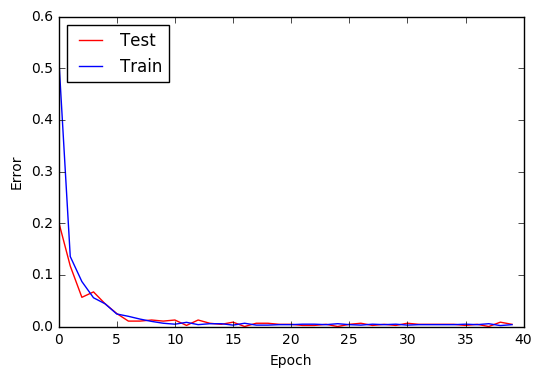

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

class hand_write():
    def __init__(self,write,sign):
        self.write = write
        self.sign = sign

class Neural_Network():
    def __init__(self):
        
        self.input_size = 256
        self.hidden_size = 50
        self.output_size = 10
        self.train_size = 1115
        
        self.learning_r = 0.35
        self.hidden = []
        self.output = []
        self.w1 = []
        self.w2 = []
        self.data_set = []
        #w1 size = hidden_size*(inputsize + 1 )
        for i in range(self.hidden_size):
            w = np.random.uniform(-0.1,0.1,self.input_size+1)
            self.w1.append(w)
        #w2 size = output_size *(hidden_size +1)
        for i in range(self.output_size):
            w = np.random.uniform(-0.1,0.1,self.hidden_size+1)
            self.w2.append(w)
        #w1 size = hidden_size*(inputsize + 1)
        self.w1 = np.asarray(self.w1)
        self.w2 = np.asarray(self.w2)
        
        with open("/Users/Wushengtan/Desktop/AI/semeion.data","r") as f:
            for line in f:
                numbers = np.array(line.split()).astype(np.float)
                self.data_set.append(hand_write(numbers[0:256],
                                                numbers[256:]))        
        f.close()
        self.train_error = []
        self.test_error = []
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def forward(self, X, target):
        # In this case np.dot(vector,matrix)
        biasX = np.insert(X,0,1)
        
        self.hidden = np.asarray(self.sigmoid(np.dot(self.w1,biasX)))
        
        biasH = np.insert(self.hidden,0,1)
        self.output = np.asarray(self.sigmoid(np.dot(self.w2,biasH)))
        index = np.argmax(self.output)
        output = np.zeros(10)
        output[index] = 1.0
        if np.array_equal(output,target):
            return 0.0
        else:
            return 1.0
    
    def backward(self, X, target):
        self.error2 = self.output*(1-self.output)*(target - self.output)
        self.error1 = self.hidden*(1-self.hidden)*np.delete(np.dot(self.error2,self.w2),0)
        biasX = np.insert(X,0,1)
        biasH = np.insert(self.hidden,0,1)
        self.w2 += self.learning_r*np.outer(self.error2,biasH)
        self.w1 += self.learning_r*np.outer(self.error1,biasX)
        
    def training(self):
        epoch = 1
        test_avg_err = 1
        while epoch<41:# run for 40 epoches
            print("Epoch {0}:".format(epoch))
            #Shuffling...
            self.train_set = random.sample(self.data_set,self.train_size)
            self.test_set = list(set(self.data_set)-set(self.train_set))
            train_sum = 0
            test_sum = 0
            for i in range(self.train_size):               
                train_e = self.forward(self.train_set[i].write, self.train_set[i].sign)                
                self.backward(self.train_set[i].write, self.train_set[i].sign)
                train_sum += train_e
                
            #Renew avg_err of training set

            train_avg_err = round(float(train_sum)/1115,5)
            self.train_error.append(train_avg_err)
            print("training error = {0:5f}%".format(train_avg_err*100))
            

        
            #Testing
            for i in range(len(self.data_set)-self.train_size):
                test_e = self.forward(self.test_set[i].write, self.test_set[i].sign)
                test_sum += test_e
            #Renew avg_err of testing set
            test_avg_err = round(float(test_sum)/478,5)
            self.test_error.append(test_avg_err)
            print("testing error = {0:5f}% \n".format(test_avg_err*100))
          
            epoch +=1
            
        
            
        self.plot()
       
            
    def test(self):
        print("w1:",self.w1.shape)
        print("w2:",self.w2)
        
    def plot(self):
        plt.gca().set_color_cycle(['red','blue'])
        x = np.arange(len(self.test_error))
        plt.plot(x, self.test_error)
        plt.plot(x, self.train_error)            
        plt.legend(["Test","Train"],loc = "upper left")
        plt.xlabel("Epoch")
        plt.ylabel("Error")
        plt.show()

if __name__== '__main__':
    Neural_Network().training()
    